<a href="https://colab.research.google.com/github/Trota2000/IA-Final-/blob/main/DiegoTrochefinal_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Paso 1: Subir archivo txt (El Imperio Final)
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, 'r', encoding='latin-1') as f:
    text = f.read()

print("Archivo cargado, cantidad de caracteres:", len(text))

Saving El Imperio Final.txt to El Imperio Final.txt
Archivo cargado, cantidad de caracteres: 1269221


In [14]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 87.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
# Paso 2: Preprocesamiento - Limpiar el dataset
import re

# Convertir a minúscula
text = text.lower()

# Limpiar caracteres especiales, números, guiones, puntuaciones
cleaned_text = re.sub(r'[^\w\s]', '', text)
cleaned_text = re.sub(r'\d+', '', cleaned_text)  # eliminar números
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # eliminar espacios múltiples

print("Texto limpio (primeros 500 caracteres):")
print(cleaned_text[:500])

import spacy

nlp = spacy.load("es_core_news_sm")
nlp.max_length = 1500000  # También podés probar a aumentar el límite

def process_in_chunks(text, chunk_size=100000):
    tokens = []
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i+chunk_size]
        doc = nlp(chunk)
        meaningful_pos = {'NOUN', 'PROPN', 'VERB', 'ADJ'}
        filtered = [token.text for token in doc if token.pos_ in meaningful_pos and not token.is_stop]
        tokens.extend(filtered)
    return tokens

filtered_tokens = process_in_chunks(cleaned_text)

print(f"Tokens con significado propio tras procesar en chunks: {len(filtered_tokens)}")
print("Ejemplo tokens filtrados:", filtered_tokens[:20])


Texto limpio (primeros 500 caracteres):
durante mil años han caído las cenizas y nada florece durante mil años los skaa han sido esclavizados y viven sumidos en un miedo inevitable durante mil años el lord legislador reina con un poder absoluto gracias al terror y a su divina invencibilidad le ayudan los obligadores y los inquisidores junto a la poderosa magia de la alomancia que reside en los nobles algunos sólo algunos son capaces de quemar los metales que han tragado y que les otorgan poderes sobrenaturales diferentes metales actua
Tokens con significado propio tras procesar en chunks: 86636
Ejemplo tokens filtrados: ['años', 'caído', 'cenizas', 'florece', 'años', 'skaa', 'esclavizados', 'viven', 'sumidos', 'miedo', 'inevitable', 'años', 'lord', 'legislador', 'reina', 'absoluto', 'terror', 'divina', 'invencibilidad', 'ayudan']


In [17]:
# Paso 3: Tokenización y conteo
from collections import Counter

tokens = filtered_tokens
word_count = len(tokens)
word_freq = Counter(tokens)
most_common_word, freq = word_freq.most_common(1)[0]

print(f"\nCantidad total de palabras (filtradas): {word_count}")
print(f"Palabra más frecuente con significado propio: '{most_common_word}' con {freq} repeticiones")



Cantidad total de palabras (filtradas): 86636
Palabra más frecuente con significado propio: 'kelsier' con 2169 repeticiones


In [18]:
# Paso 4: Vectorización TF-IDF con stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

from sklearn.feature_extraction.text import TfidfVectorizer

# Dividir en fragmentos de 500 palabras para análisis
chunks = [' '.join(tokens[i:i+500]) for i in range(0, len(tokens), 500)]

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(chunks)

print(f"\nCantidad de fragmentos vectorizados: {X.shape[0]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Cantidad de fragmentos vectorizados: 174


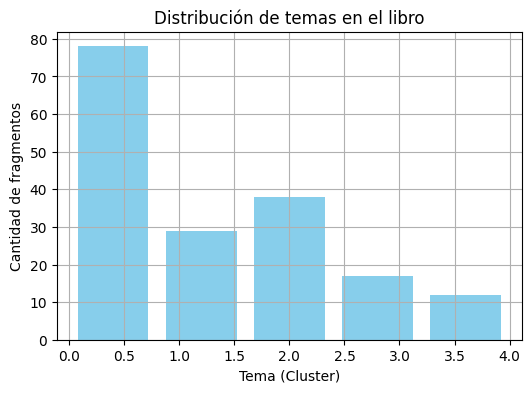

In [19]:

# Paso 5: Clustering KMeans para análisis temático
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

plt.figure(figsize=(6,4))
plt.hist(kmeans.labels_, bins=num_clusters, color='skyblue', rwidth=0.8)
plt.title("Distribución de temas en el libro")
plt.xlabel("Tema (Cluster)")
plt.ylabel("Cantidad de fragmentos")
plt.grid(True)
plt.show()


In [20]:

# Paso 6: Queries simples para interactividad
def interactive_queries():
    while True:
        print("\n" + "="*50)
        print("💬 SISTEMA DE PREGUNTAS Y RESPUESTAS")
        print("="*50)
        print("Escribe 'salir' para terminar.")
        print("1) ¿Cuántas palabras tiene el texto (filtrado)?")
        print("2) ¿Cuál es la palabra más repetida del texto?")
        print("3) ¿Cuáles son las palabras clave por tema?")
        print("4) ¿Cuál es el contexto principal del libro?")
        print("5) ¿Cuántos temas fueron identificados en el libro?")
        print("6) ¿Cuáles son las palabras más frecuentes en el texto?")
        print("7) ¿Cuáles son las palabras clave más importantes de un tema específico?")
        print("8) ¿Cuáles son los fragmentos más representativos de un tema específico?")

        question = input("🤔 Tu pregunta: ").strip().lower()

        if question == "salir":
            print("👋 ¡Hasta luego!")
            break
        elif "cuántas palabras" in question:
            print(f"Cantidad total de palabras (filtradas): {word_count}")
        elif "palabra más repetida" in question:
            print(f"La palabra más repetida es '{most_common_word}' con {freq} repeticiones.")
        elif "palabras clave por tema" in question:
            for i in range(num_clusters):
                cluster_idx = np.where(kmeans.labels_ == i)[0]
                cluster_tfidf = X[cluster_idx].mean(axis=0)
                top_indices = np.argsort(cluster_tfidf).flatten()[::-1][:10]
                print(f"Tema {i+1}: ", [str(vectorizer.get_feature_names_out()[idx]) for idx in top_indices])
        elif "contexto principal" in question:
            print("El contexto principal del libro puede ser explorado a través de los temas identificados por clustering.")
        elif "cuántos temas" in question:
            print(f"Se han identificado {num_clusters} temas principales en el libro.")
        elif "palabras más frecuentes" in question:
            print(f"Las 10 palabras más frecuentes en el texto son:")
            for word, count in word_freq.most_common(10):
                print(f"{word}: {count} veces")
        elif "palabras clave más importantes" in question:
            topic = input("¿De qué tema específico deseas saber las palabras clave? (Ejemplo: Tema 1): ").strip().lower()
            try:
                topic_num = int(topic.split()[-1]) - 1  # Convertir 'Tema 1' a índice 0, 'Tema 2' a índice 1, etc.
                cluster_idx = np.where(kmeans.labels_ == topic_num)[0]
                cluster_tfidf = X[cluster_idx].mean(axis=0)
                top_indices = np.argsort(cluster_tfidf).flatten()[::-1][:10]
                print(f"Palabras clave más importantes de {topic}: ", [str(vectorizer.get_feature_names_out()[idx]) for idx in top_indices])
            except Exception as e:
                print(f"❌ Error: {e}. Asegúrate de ingresar el tema de manera correcta.")
        elif "fragmentos más representativos" in question:
            topic = input("¿De qué tema específico deseas saber los fragmentos representativos? (Ejemplo: Tema 1): ").strip().lower()
            try:
                topic_num = int(topic.split()[-1]) - 1  # Convertir 'Tema 1' a índice 0, 'Tema 2' a índice 1, etc.
                cluster_idx = np.where(kmeans.labels_ == topic_num)[0]
                print(f"Los fragmentos más representativos de {topic} son:")
                for idx in cluster_idx[:5]:  # Mostrar los primeros 5 fragmentos representativos
                    print(f"Fragmento {idx + 1}: {chunks[idx][:200]}...")  # Mostrar solo los primeros 200 caracteres de cada fragmento
            except Exception as e:
                print(f"❌ Error: {e}. Asegúrate de ingresar el tema de manera correcta.")
        else:
            print("❌ No entiendo la pregunta. Intenta con otra.")


In [21]:
# Paso 7: Ejecutar las consultas interactivas
interactive_queries()


💬 SISTEMA DE PREGUNTAS Y RESPUESTAS
Escribe 'salir' para terminar.
1) ¿Cuántas palabras tiene el texto (filtrado)?
2) ¿Cuál es la palabra más repetida del texto?
3) ¿Cuáles son las palabras clave por tema?
4) ¿Cuál es el contexto principal del libro?
5) ¿Cuántos temas fueron identificados en el libro?
6) ¿Cuáles son las palabras más frecuentes en el texto?
7) ¿Cuáles son las palabras clave más importantes de un tema específico?
8) ¿Cuáles son los fragmentos más representativos de un tema específico?


KeyboardInterrupt: Interrupted by user

In [22]:
#Paso 8: Análisis temático - palabras clave por cluster

terms = vectorizer.get_feature_names_out()

cluster_keywords = {}
for i in range(num_clusters):
    cluster_idx = np.where(kmeans.labels_ == i)[0]
    cluster_tfidf = X[cluster_idx].mean(axis=0)
    top_indices = np.argsort(cluster_tfidf).flatten()[::-1][:10]
    cluster_keywords[f"Tema {i+1}"] = [str(terms[i]) for i in top_indices]

print("\nPalabras clave por tema:")
for tema, palabras in cluster_keywords.items():
    print(f"\n🔹 {tema}:")
    print(", ".join(palabras))


Palabras clave por tema:

🔹 Tema 1:
[['transigido' 'dejándolo' 'dejándoles' ... 'camon' 'vin' 'kelsier']]

🔹 Tema 2:
[['maltrechos' 'malhumorada' 'maliciosa' ... 'venture' 'vin' 'elend']]

🔹 Tema 3:
[['ex' 'recorrido' 'recorriendo' ... 'dockson' 'brisa' 'kelsier']]

🔹 Tema 4:
[['mina' 'migajas' 'milagro' ... 'soldados' 'inquisidor' 'kelsier']]

🔹 Tema 5:
[['malditos' 'malignidad' 'maligna' ... 'lord' 'legislador' 'marsh']]


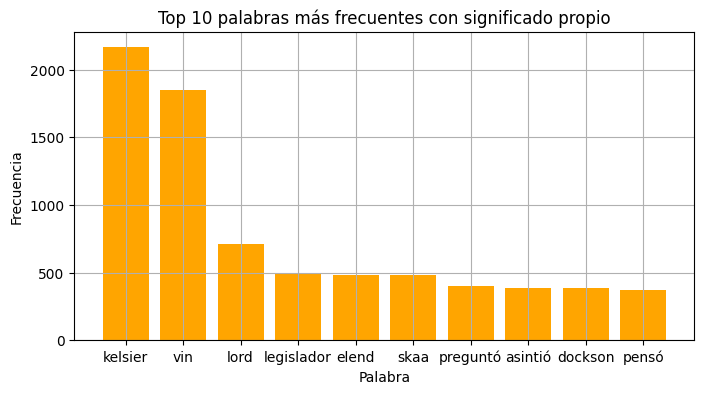


📌 CONCLUSIÓN:
El libro 'El Imperio Final' contiene aproximadamente 86636 palabras significativas filtradas, lo que ayuda a centrar el análisis en vocabulario relevante.
El análisis temático mediante clustering identificó 5 tópicos principales con palabras clave bien definidas.
El mini resumen automático brinda un panorama del contenido inicial.
Esta metodología facilita comprender y explorar grandes textos sin depender de APIs externas.



In [23]:

# Paso 9: Gráfico de palabras más frecuentes
import pandas as pd

top_words = word_freq.most_common(10)
df_top = pd.DataFrame(top_words, columns=["Palabra", "Frecuencia"])

plt.figure(figsize=(8,4))
plt.bar(df_top["Palabra"], df_top["Frecuencia"], color='orange')
plt.title("Top 10 palabras más frecuentes con significado propio")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Conclusión corta, concisa y directa
print("""
📌 CONCLUSIÓN:
El libro 'El Imperio Final' contiene aproximadamente {0} palabras significativas filtradas, lo que ayuda a centrar el análisis en vocabulario relevante.
El análisis temático mediante clustering identificó 5 tópicos principales con palabras clave bien definidas.
El mini resumen automático brinda un panorama del contenido inicial.
Esta metodología facilita comprender y explorar grandes textos sin depender de APIs externas.
""".format(word_count))